In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

from datetime import datetime, timedelta

plt.style.use('dark_background')
mpl.rcParams['axes.unicode_minus'] = False
#font_path = '/content/drive/MyDrive/data/AppleSDGothicNeo.ttc'
#font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
#font_name = fm.FontProperties(fname=font_path, size=50).get_name()#plt.rc('font', family=font_name)

In [3]:
# Load Big 5 Dataset
# https://www.kaggle.com/datasets/tunguz/big-five-personality-test
# https://blog.naver.com/ygahon/60157517095
# https://openpsychometrics.org/tests/IPIP-BFFM/
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Emotional Stability 안정성(신경성)
]

neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 Openness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'EST2','EST4',                       # 2 Emotional Stability
]

usecols = pos_questions + neg_questions + ['country']

df = pd.read_csv('/content/drive/MyDrive/data/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t', usecols=usecols) # tsv

print(len(df))

df.head()

1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [4]:
# Drop Rows Contains 0
df = df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True) # 0 제거

print(len(df))

df.head()

874366


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [5]:
# Filter Countries
df_2 = (df.groupby('country').agg('count')['EXT1'] > 100).reset_index() # 답변이 적으면 pass

fc = df_2[df_2['EXT1'] == True]['country']

df = df[df['country'].isin(fc)].reset_index(drop=True)

df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872089,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
872090,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
872091,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
872092,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [6]:
# Positive Negative Scores / 1 ~ 5 => -2 ~ 2 반대로 적용(negative)
df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,GB
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,...,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,MY
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,...,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,GB
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,...,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,GB
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,KE


In [7]:
# Compute Scores / 같은 항목의 질문들을 취합
traits = {
    'OPN': '개방성',
    'CSN': '성실성',
    'EXT': '외향성',
    'AGR': '친화성',
    'EST': '안정성'
}

for trait, trait_kor in traits.items():
    trait_cols = sorted([col for col in df.columns if trait in col])
    df[trait_kor] = df[trait_cols].sum(axis=1)

df_traits = df[list(traits.values()) + ['country']].copy()
df_traits.head()

,개방성,성실성,외향성,친화성,안정성,country
0,15.0,2.0,16.0,9.0,-6.0,GB
1,5.0,7.0,-10.0,14.0,-5.0,MY
2,11.0,4.0,-5.0,12.0,-4.0,GB
3,9.0,-5.0,-4.0,8.0,-1.0,GB
4,18.0,18.0,-1.0,16.0,-11.0,KE


<ipython-input-8-6722a0afb36a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  func

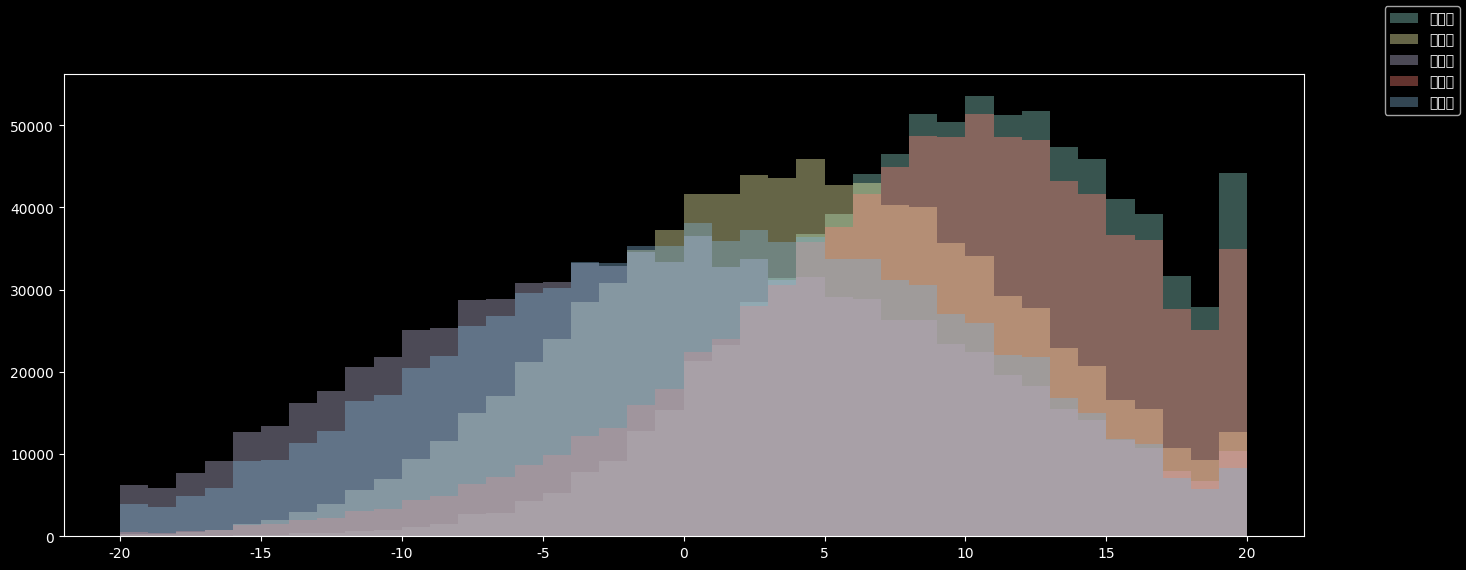

In [8]:
# Distribution Plot
fig = plt.figure(figsize=(16, 6))

for trait in traits.values():
    sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)

fig.legend(traits.values())

<ipython-input-10-9fed62829d49>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
<ipython-input-10-9fed62829d49>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_traits[df_traits['country'] == 'DE']['개방성'], bins=40, axlab

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing fr

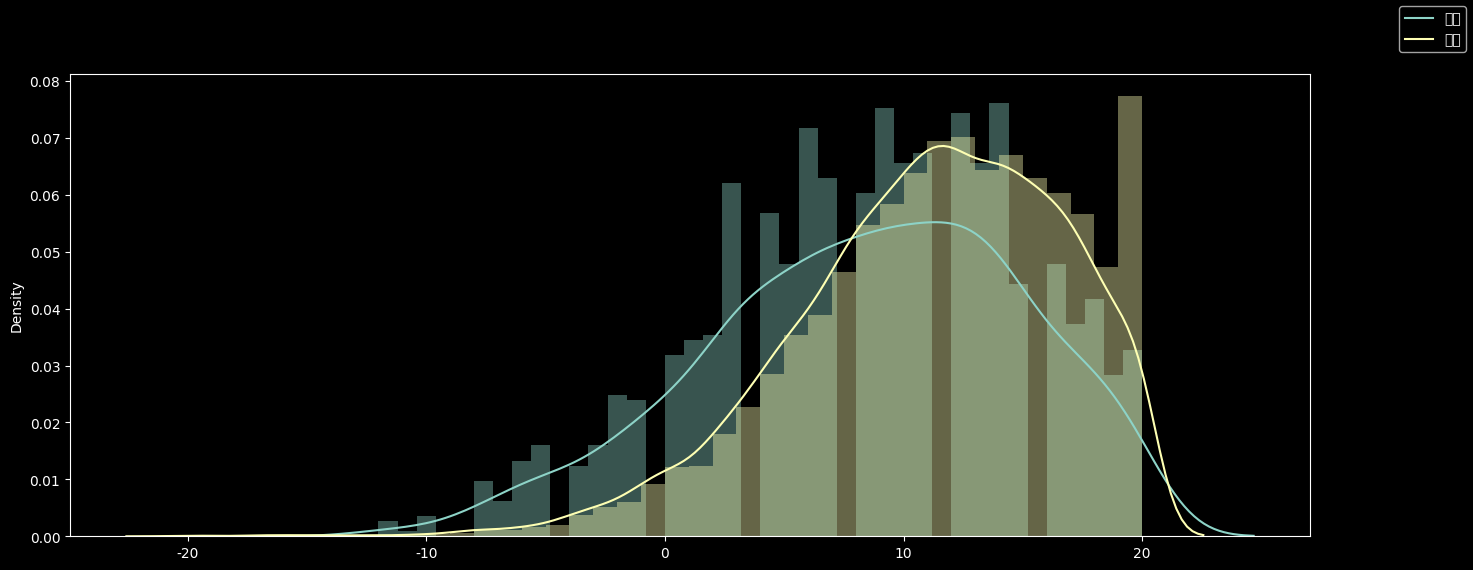

In [10]:
# Openness Korea vs Germany
fig = plt.figure(figsize=(16, 6))

sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] == 'DE']['개방성'], bins=40, axlabel=False)

fig.legend(['한국', '독일'])

In [11]:
# Compute Mean by Countries
df_traits_mean = df_traits.groupby('country').mean().rename_axis('country').reset_index()

df_traits_mean

,country,개방성,성실성,외향성,친화성,안정성
0,AE,7.639791,4.032090,0.261933,7.917770,1.475732
1,AL,10.188889,3.391667,-1.361111,6.205556,1.361111
2,AR,10.133075,1.678530,-1.654932,6.416248,2.381431
3,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666
4,AU,8.551472,3.626061,-0.062085,7.918328,0.393272
...,...,...,...,...,...,...
108,US,9.105058,4.166036,-0.214579,8.338453,0.366914
109,UY,9.848375,2.137184,-1.902527,6.324910,1.574007
110,VE,10.106996,1.933128,-1.233539,5.512346,1.705761
111,VN,6.272773,2.327828,-2.323323,5.792793,1.590591


In [12]:
#####################################
# COVID-19 Dataset
# github.com/datasets/covid-19
# github.com/core/country-list
df_covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

df_covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [13]:
# Country Code

cc = pd.read_csv('/content/drive/MyDrive/data/country_code.csv')

cc.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [14]:
# Filter Dataset Step 1
# Drop rows Confirmed <= 50
# Sum 'Province/State' level over by country
df_covid = df_covid[df_covid['Confirmed'] > 50].reset_index(drop=True)

df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()

df_covid[df_covid['Country/Region'] == 'US']

<ipython-input-14-bfb49c4a2f05>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()


,Country/Region,Date,Confirmed,Recovered,Deaths
126911,US,2020-03-02,55,7.0,6
126912,US,2020-03-03,74,7.0,7
126913,US,2020-03-04,107,7.0,11
126914,US,2020-03-05,184,7.0,12
126915,US,2020-03-06,237,7.0,14
...,...,...,...,...,...
127682,US,2022-04-12,80477797,0.0,986387
127683,US,2022-04-13,80518989,0.0,987343
127684,US,2022-04-14,80573532,0.0,988121
127685,US,2022-04-15,80612681,0.0,988558


In [15]:
# Filter Dataset Step 2
# Over 14 days from after 50 confirmed
n_days = 14

filtered = (
    datetime.now() - df_covid.groupby('Country/Region')['Date'].min() > timedelta(days=n_days)
).reset_index().rename(columns={'Date': 'Filtered'})

filtered_countries = filtered[filtered['Filtered'] == True]['Country/Region']

df_covid = df_covid[df_covid['Country/Region'].isin(filtered_countries)]

df_covid_14days = df_covid.groupby('Country/Region').head(n_days).groupby('Country/Region').tail(1)

df_covid_14days

,Country/Region,Date,Confirmed,Recovered,Deaths
13,Afghanistan,2020-04-07,367,18.0,11
766,Albania,2020-03-29,212,33.0,10
1528,Algeria,2020-03-29,511,31.0,31
2290,Andorra,2020-04-01,390,10.0,14
3049,Angola,2020-06-01,86,18.0,4
...,...,...,...,...,...
133819,West Bank and Gaza,2020-04-04,217,21.0,1
134575,Winter Olympics 2022,2022-02-05,425,0.0,0
134659,Yemen,2020-05-23,212,6.0,39
135366,Zambia,2020-04-30,106,55.0,3


In [16]:
# Merge All
df_covid_14days = df_covid_14days.merge(cc, left_on='Country/Region', right_on='Name')

df_covid_14days = df_covid_14days.merge(df_traits_mean, left_on='Code', right_on='country')

df_covid_14days.sort_values('Confirmed', ascending=False)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
18,China,2020-02-04,23524,840.0,490,China,CN,CN,6.453737,3.510676,0.095196,7.660142,-0.177046
90,Turkey,2020-03-31,13531,243.0,214,Turkey,TR,TR,9.706407,3.132603,-0.768451,6.029197,2.375912
83,Spain,2020-03-14,6391,517.0,195,Spain,ES,ES,10.030204,2.424257,0.021840,7.400558,0.417983
44,Italy,2020-03-06,4636,523.0,197,Italy,IT,IT,10.193612,2.803107,-1.071757,6.770291,2.185955
13,Brazil,2020-03-25,2554,2.0,59,Brazil,BR,BR,10.536946,1.240467,-3.494983,4.946725,1.545703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Trinidad and Tobago,2020-04-05,104,1.0,7,Trinidad and Tobago,TT,TT,9.061125,4.491443,-2.706601,7.601467,1.234719
79,Singapore,2020-02-26,93,62.0,0,Singapore,SG,SG,6.591807,3.079186,-1.608106,6.836146,1.158806
5,Bahamas,2020-04-29,80,23.0,11,Bahamas,BS,BS,8.842975,6.173554,-1.165289,8.066116,-2.338843
8,Barbados,2020-04-16,75,15.0,5,Barbados,BB,BB,7.856000,3.208000,-3.320000,7.720000,-0.392000


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  func

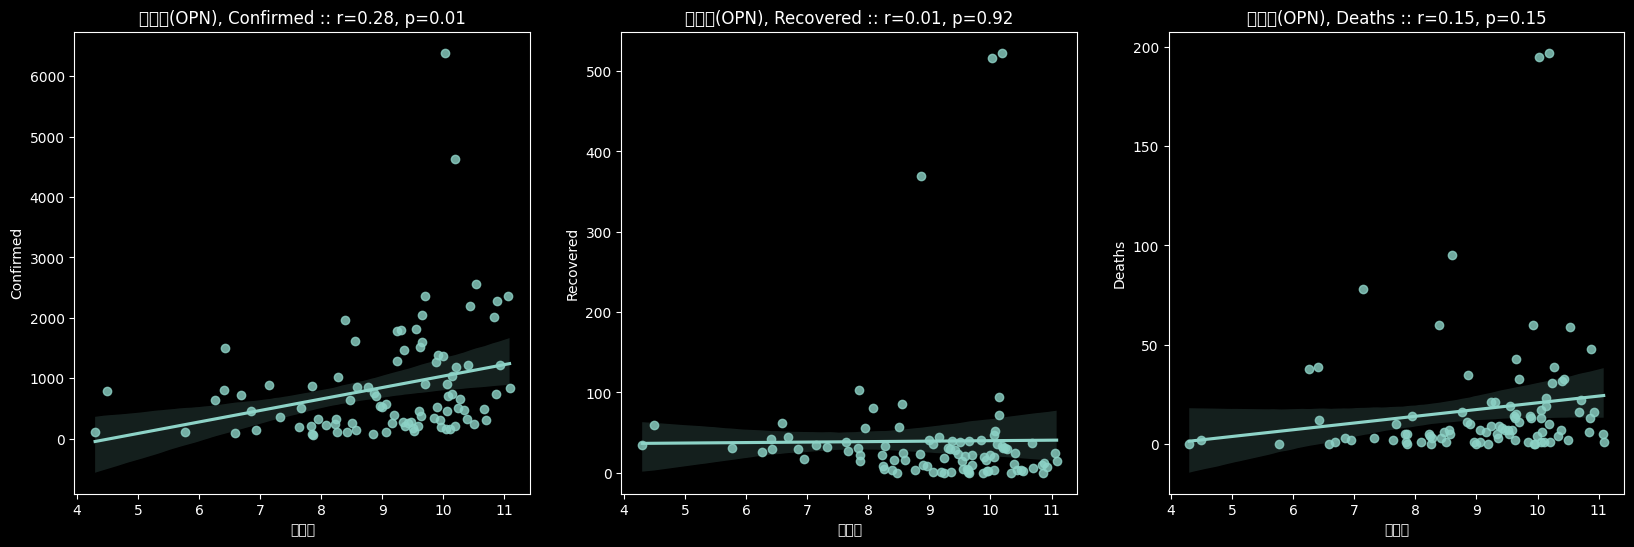

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


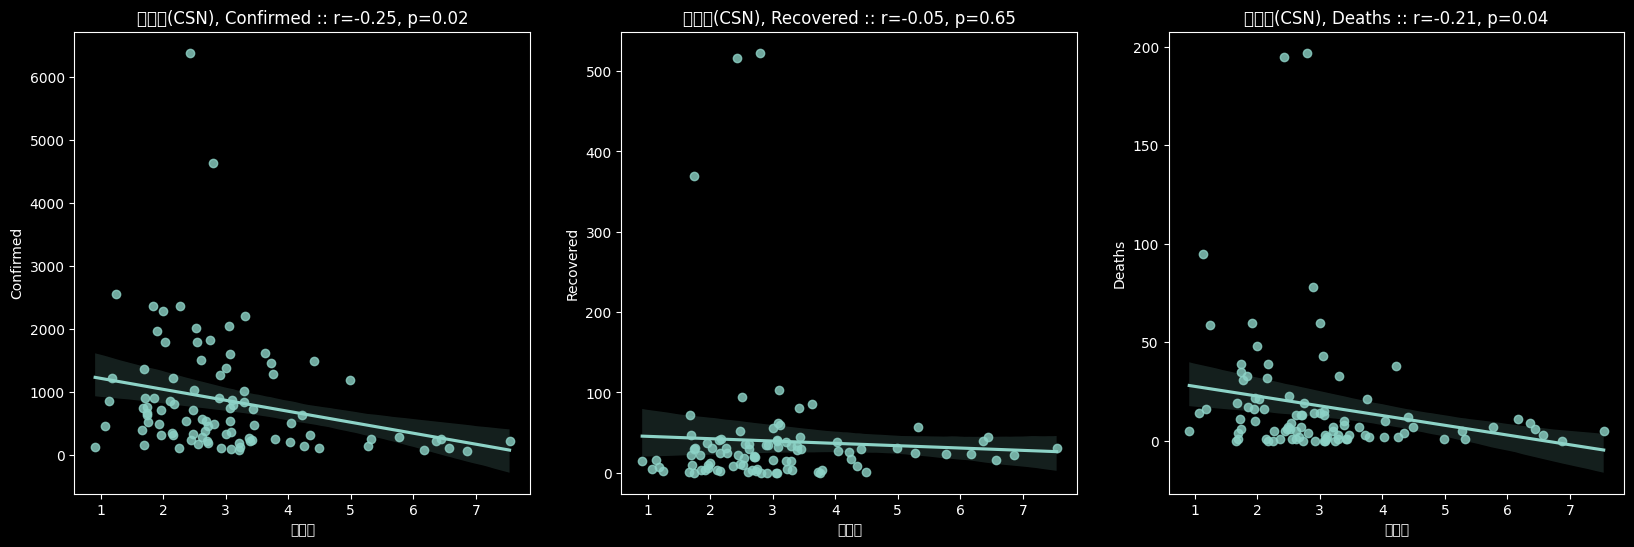

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


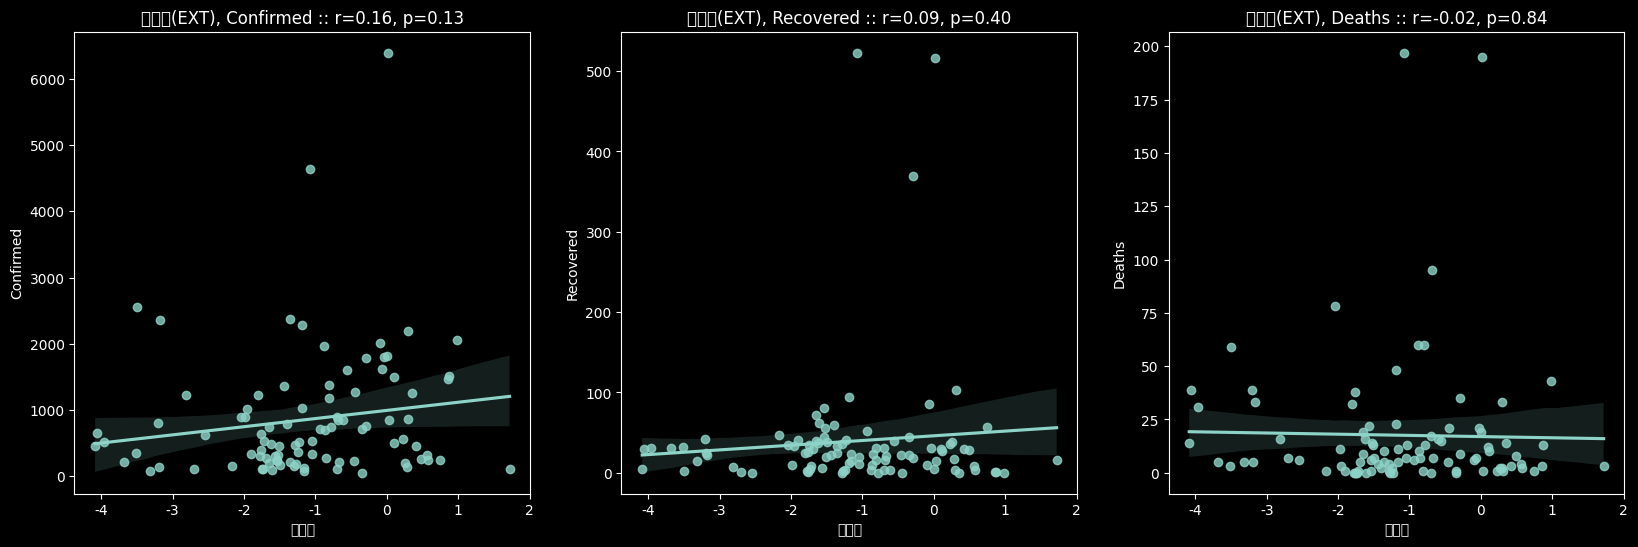

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


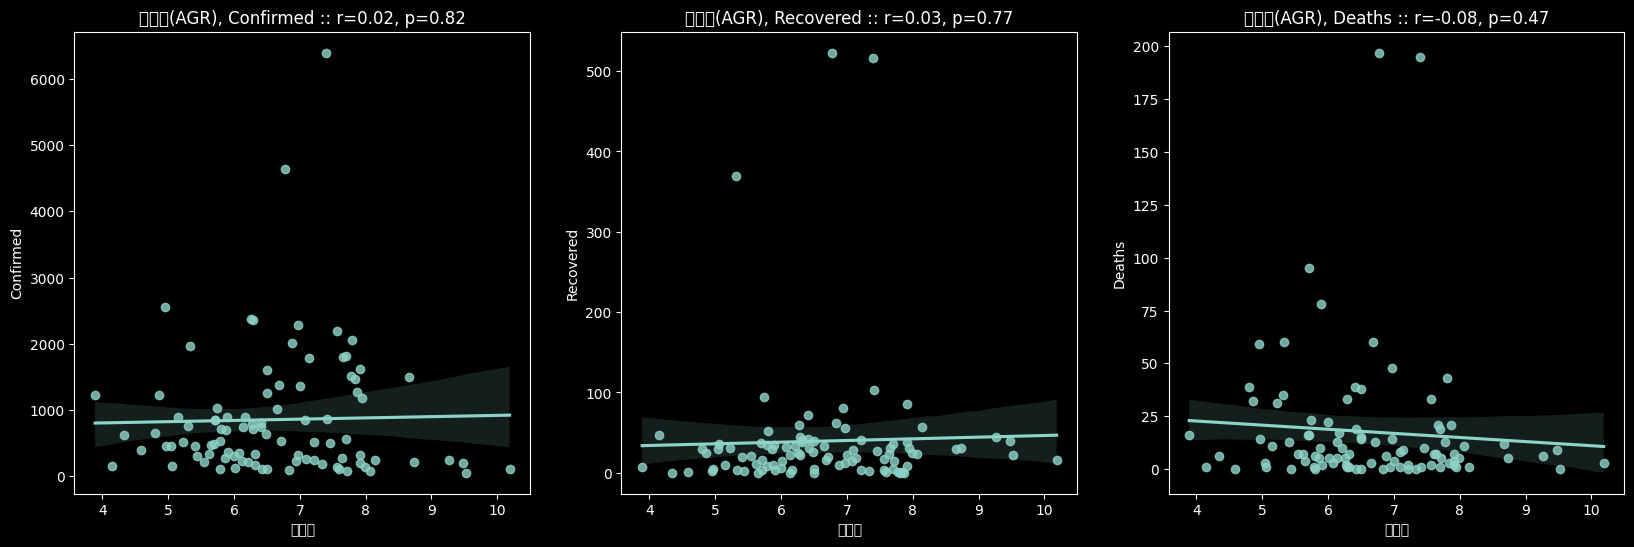

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


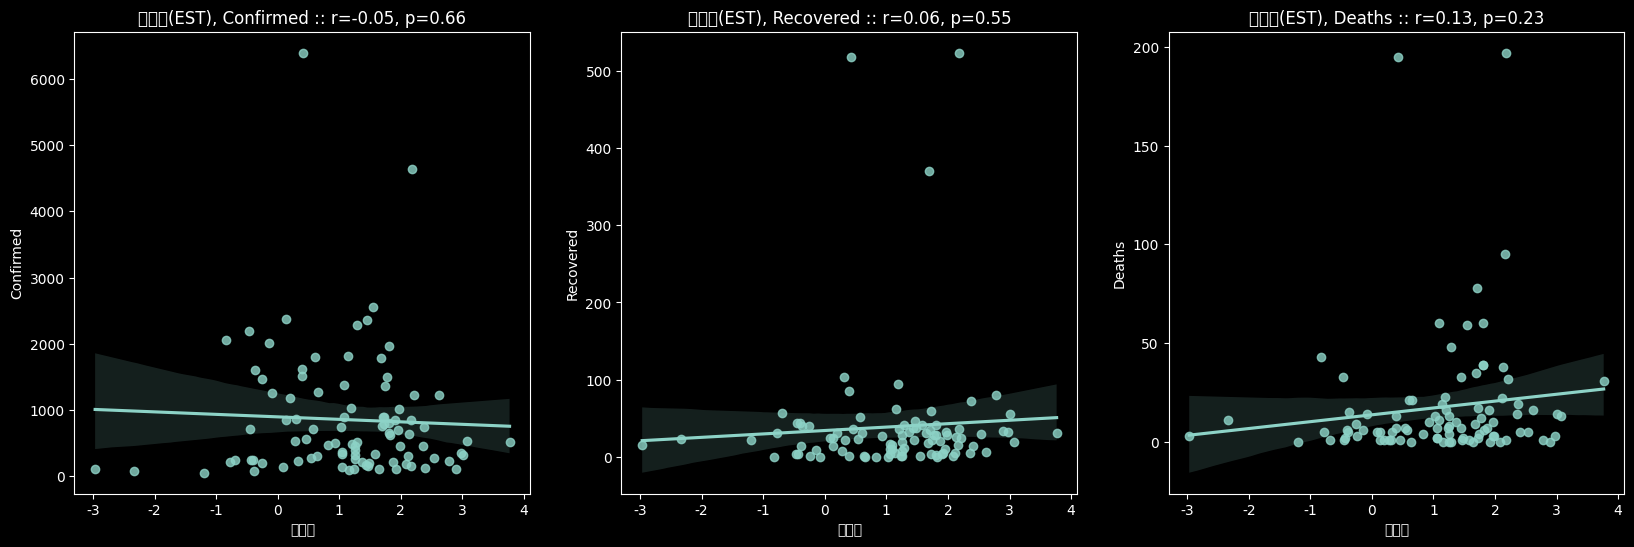

In [17]:
# Compute Pearson Correlation
new_df = df_covid_14days[
    ~df_covid_14days['country'].isin(['CN', 'TR']) # 경향에서 벗어나서 제외
]

for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = pearsonr(
            new_df[trait_kor],
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1])) #[1] 틀릴 확률

In [18]:
# Sort by Openness
new_df.sort_values('개방성', ascending=False)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
43,Israel,2020-03-21,843,14.0,1,Israel,IL,IL,11.083536,3.291971,0.030819,7.085158,0.138686
33,Germany,2020-03-12,2369,25.0,5,Germany,DE,DE,11.064345,2.262837,-1.361762,6.261473,0.133023
73,Poland,2020-03-26,1221,7.0,16,Poland,PL,PL,10.927395,1.188124,-2.813872,3.890469,2.611776
31,France,2020-03-12,2281,12.0,48,France,FR,FR,10.871051,2.003880,-1.184740,6.968964,1.292444
78,Serbia,2020-03-29,741,0.0,13,Serbia,RS,RS,10.856000,3.075429,-0.786286,6.137714,1.032571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Bangladesh,2020-04-13,803,42.0,39,Bangladesh,BD,BD,6.404669,2.171206,-3.206226,6.404669,1.813230
72,Philippines,2020-03-25,636,26.0,38,Philippines,PH,PH,6.259472,4.214388,-1.764388,6.492746,2.128897
61,Nepal,2020-05-09,110,31.0,0,Nepal,NP,NP,5.772917,2.260417,-0.697917,6.425000,1.637500
55,Malaysia,2020-03-18,790,60.0,2,Malaysia,MY,MY,4.485457,3.113003,-1.398905,6.270903,1.720381


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  func

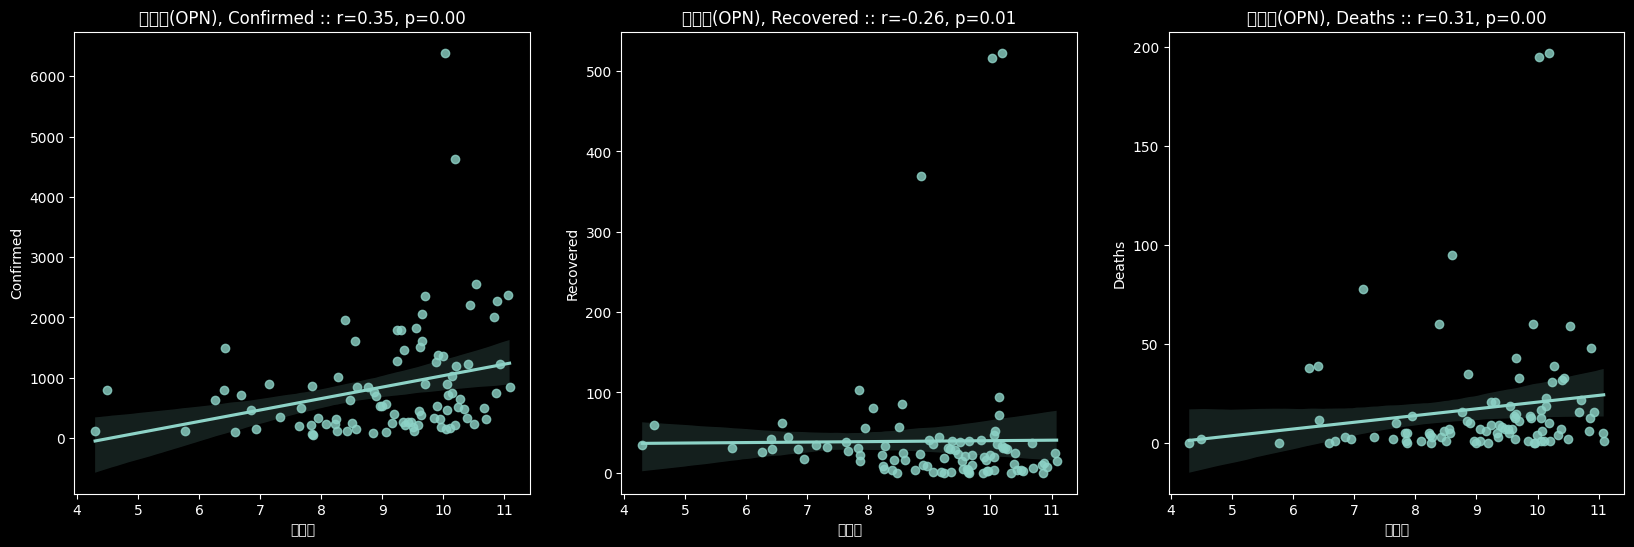

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


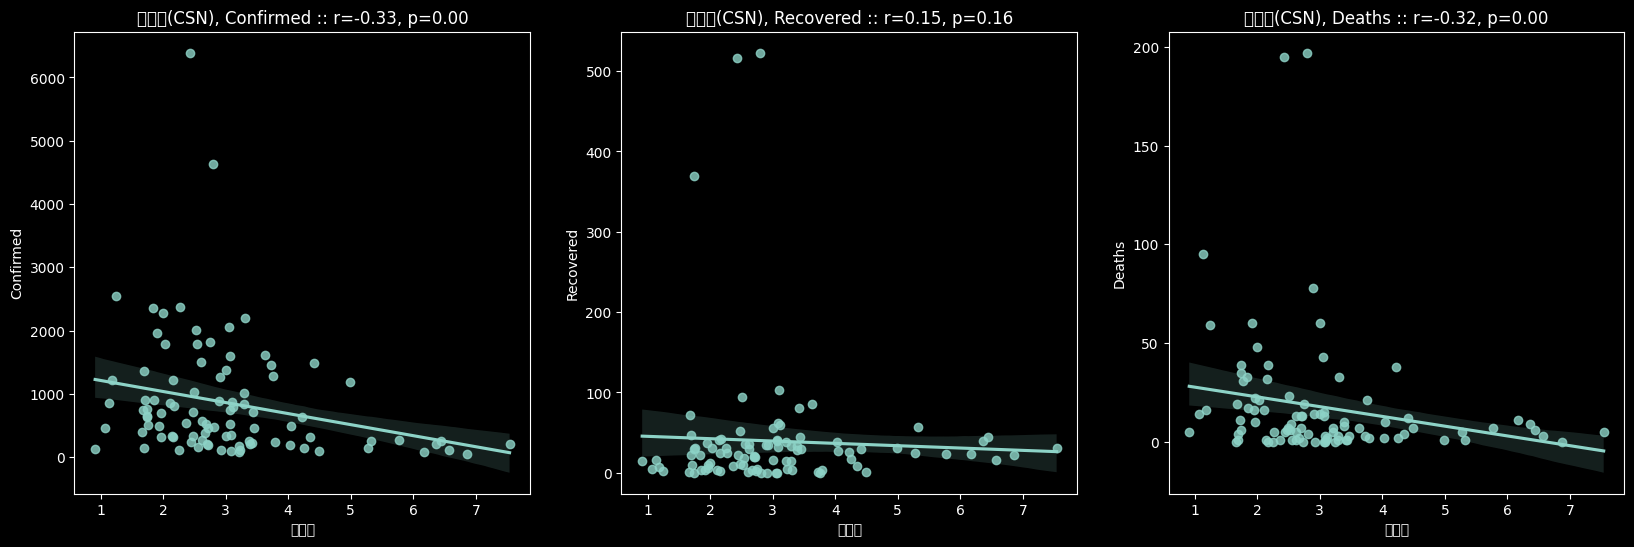

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


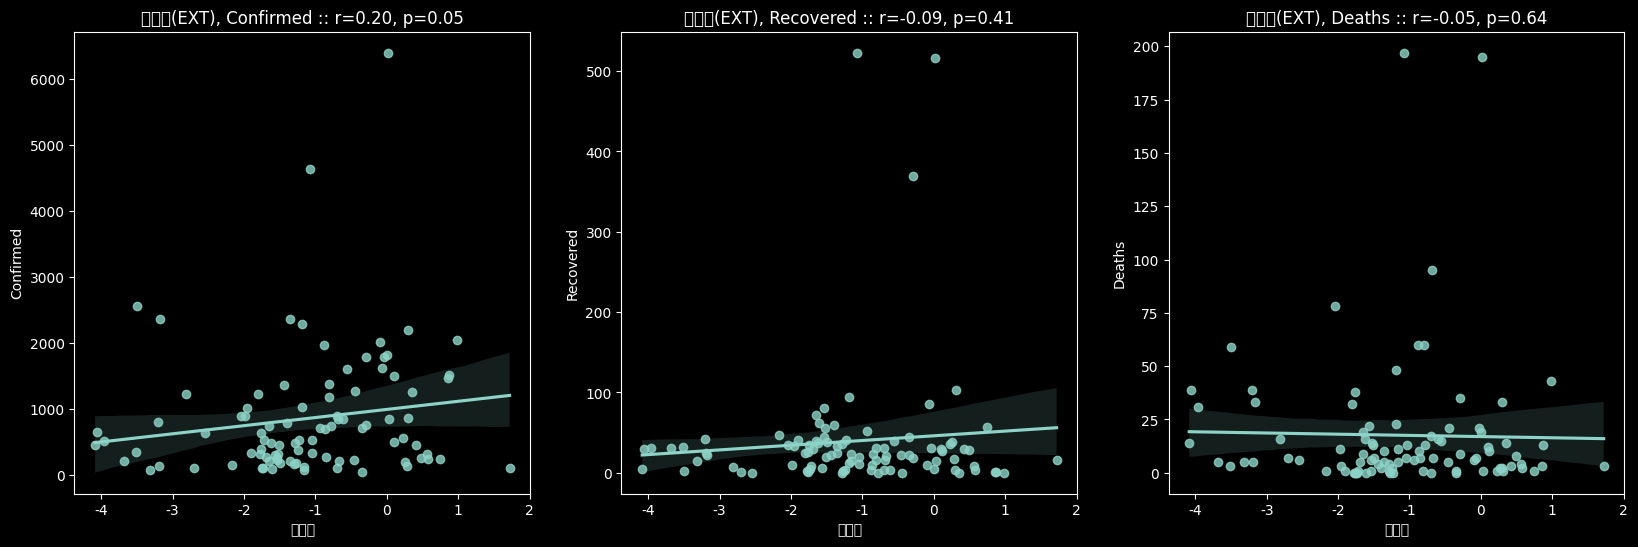

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


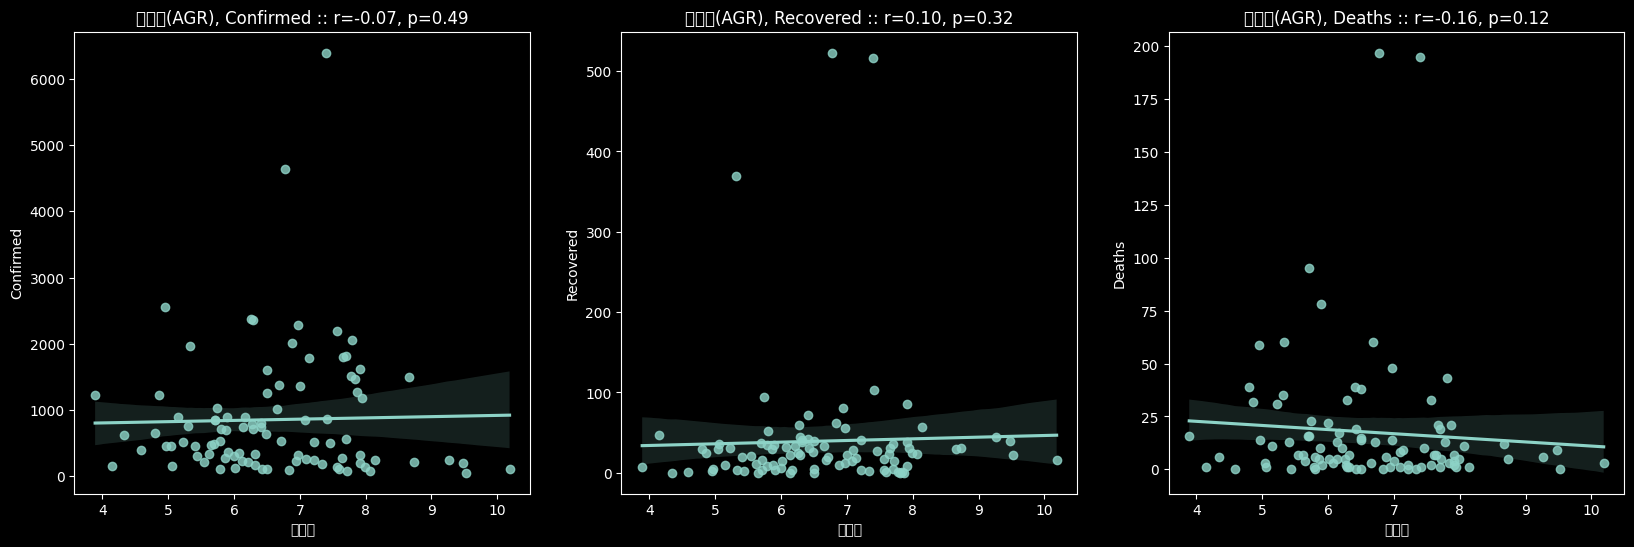

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


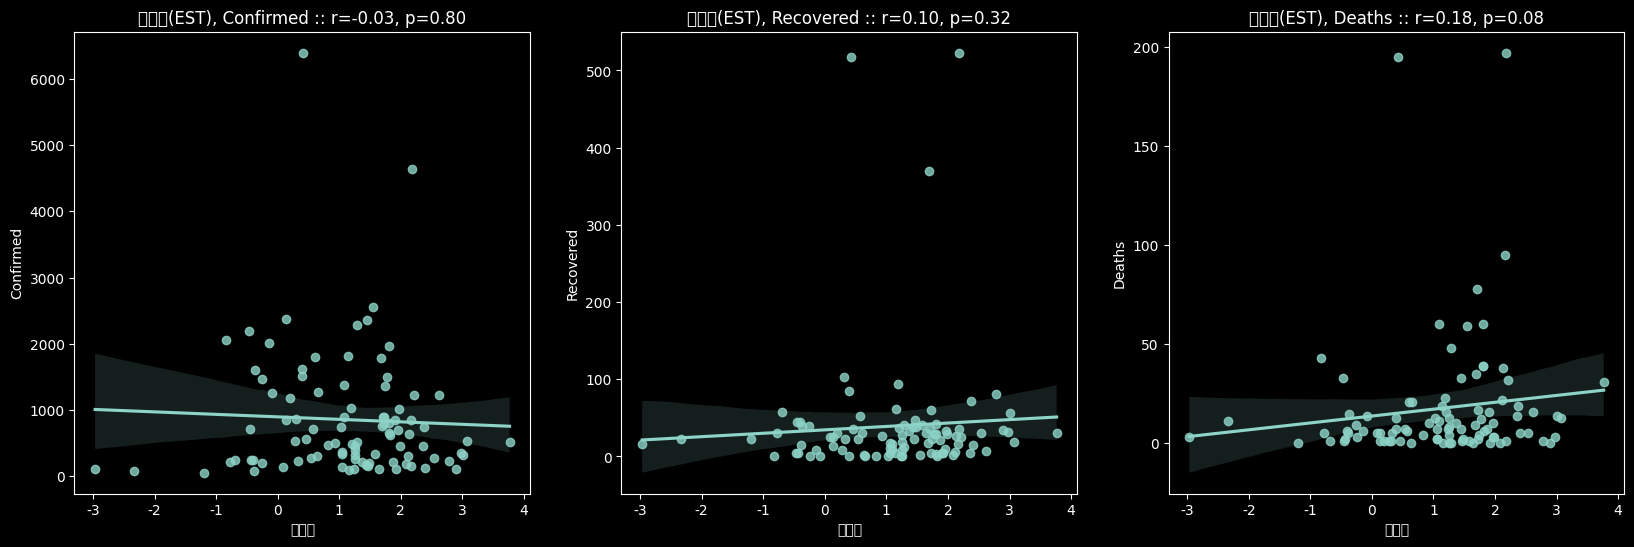

In [19]:
# Use spearmanr Instead of pearsonr
for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = spearmanr(
            new_df[trait_kor],
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))